In [2]:
#Now we'll learn about pandas built-in methods of summarizing data founr in DataFrames
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [3]:
#Let's create a dataframe to work with
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])

#Show
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [4]:
#Let's see the sum() method in action (ignores nan)
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [5]:
#Notice how it ignores NaN values

In [6]:
#We can also over columns instead of rows
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [7]:
#Can also grab min and max values of dataframe
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [8]:
#As well as the minimum index
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [9]:
#Same deal with max, just replace min for max

In [10]:
#Show
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [11]:
#Can also do an accumulation sum
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [12]:
#A very useful feature is describe, which provides summary statistics
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [13]:
# We can also get information on correlation and covariance

#For more info on correlation and covariance, check out the videos below!

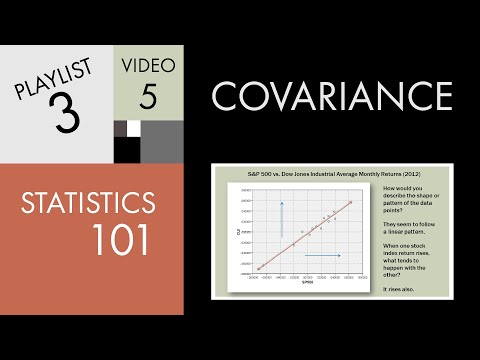

In [14]:
from IPython.display import YouTubeVideo
# For more information about Covariance and Correlation
# Check out these great videos!
# Video credit: Brandon Foltz.

#CoVariance
YouTubeVideo('xGbpuFNR1ME')

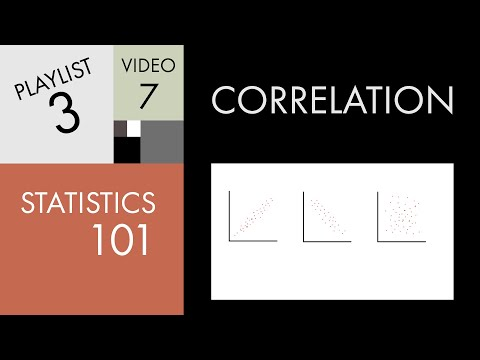

In [15]:
#Correlation
YouTubeVideo('4EXNedimDMs')

In [16]:
#Now lets check correlation and covariance on some stock prices!

#Pandas can get info off the web
# import pandas.io.data as pdweb # Not working on python3
from pandas_datareader import data as pdr # you need to install that first
import yfinance as yf
yf.pdr_override()

#Set datetime for date input
import datetime

#Get the closing prices
# BP get_data_yahoo seems wrongly used
# prices = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
#                                start=datetime.datetime(2010, 1, 1), 
#                                end=datetime.datetime(2013, 1, 1))['Adj Close']

prices = pdr.get_data_yahoo(['CVX','XOM','BP'], 
                               start='2010-01-01', 
                               end='2013-01-01')['Adj Close']

#Show preview
prices.head()

[*********************100%%**********************]  3 of 3 completed


,BP,CVX,XOM
Date,,,
2010-01-04,28.746254,45.955864,40.983089
2010-01-05,28.950367,46.281410,41.143120
2010-01-06,29.101025,46.287205,41.498734
2010-01-07,29.091311,46.112823,41.368343
2010-01-08,29.159348,46.194195,41.202393


In [17]:
#Now lets get the volume trades

volume = pdr.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Volume']

#Show preview
volume.head()

[*********************100%%**********************]  3 of 3 completed


,BP,CVX,XOM
Date,,,
2010-01-04,3956100,10173800,27809100
2010-01-05,4109600,10593700,30174700
2010-01-06,6227900,11014600,35044700
2010-01-07,4431300,9626900,27192100
2010-01-08,3786100,5624300,24891800


In [18]:
#Lets get the return
rets = prices.pct_change()

In [19]:
#Get the correlation of the stocks
corr = rets.corr

<Axes: xlabel='Date'>

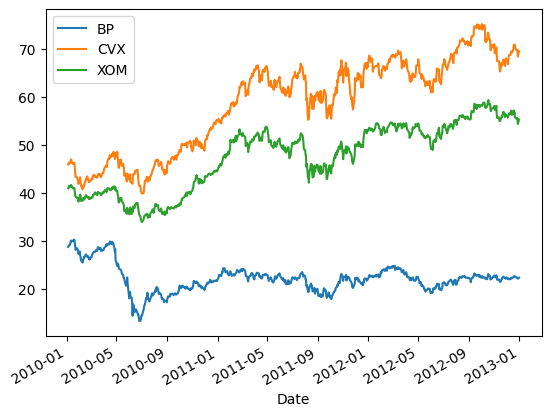

In [20]:
#Lets see the prices over time to get a very rough idea of the correlation between the stock prices
prices.plot()

<Axes: >

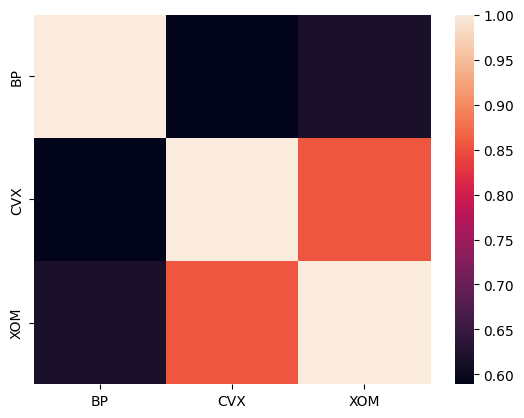

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

#As expected pretty strong correlations with eachother
sns.heatmap(rets.corr())



In [26]:
#We'll learn much more about seaborn later!
# sns.corrplot(rets,annot=False,diag_names=False) # BP this does not work

AttributeError: module 'seaborn' has no attribute 'corrplot'

In [22]:
# We can also check for unique values and their counts 

#For example
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z' ])

#Show
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [23]:
#Grab the unique values
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [24]:
#Now get the count of the unique values
ser1.value_counts()

w    4
x    3
y    2
z    2
a    1
Name: count, dtype: int64

In [25]:
#Next we'll learn how to best deal with missing data!